# Deep Learning a gyakorlatban - KisHF 1

Oldd meg az alábbi feladatokat egy Jupyter Notebookban, töltsd fel GitHub-ra és küldd el a megoldás URL-jét. Csak Github-ra feltöltött Jupyter notebook formátumot fogadunk el, amelyben a kódok mellett ANGOL NYELVŰ magyarázat és az eredmények is láthatóak.
Praktikusan Secret Gist-et küldj be. 

A feladatok:
1. Python nyelven olvass be öt darab tetszőleges 256x256 pixeles színes képet, jelenítsd meg és jelenítsd meg külön az R, G és B csatornák értékeit hisztogramon. (4p)
2. Csatornánként számold ki a pixelek átlagát és szórását minden képre, majd alakítsd át ezeket 0 várható értékű, 1 szórású adathalmazzá. Ezt követően ellenőrizd a kapott adathalmaz várható értékét és szórását. (4p)
3. Olvass be két tetszőleges hangfájlt és jelenítsd meg ezek spektrogramját. (4p)
4. Alakítsd át a spektogramokat 0 várható értékű és 1 szorású adathalmazzá. Ezt követően ellenőrizd a kapott adathalmaz várható értékét és szórását. (4p)
5. Python scriptből töltsd le a http://smartlab.tmit.bme.hu/oktatas-deep-learning oldal szöveges tartalmát, jelenítsd meg a szöveges tartalmat, továbbá hisztogramon jelenítsd meg a tartalomban a betűk előfordulásának gyakoriságát. (4p)


## 

## Image manipulation

In this section, I used generative AI tools to refine the grammar and improve the English of the text elements. I also relied on them to generate inline comments for my code. The code itself was written independently, based on my prior knowledge.

**Prompt for enchancing the text elements:**
```
Please rephrase the following texts in English, making them smoother and more natural.
```

**Prompt for the inline comments:**
```
Please explain the following code step by step in the form of inline comments. Do not make any changes to the code itself. 
```

In [14]:
# Import necessary libraries
import numpy as np # Numerical operations
from PIL import Image # Image processing
import matplotlib.pyplot as plt # Plotting

In [15]:
# List of image file paths
image_paths = [
    'images/superman.png',
    'images/mona_lisa.gif',
    'images/map.jpg',
    'images/pavian.jpg',
    'images/psyduck.png'
]

In [16]:
images = []  # Create an empty list to store image arrays
for path in image_paths:  # Loop through each file path in image_paths
    img = Image.open(path)  # Open the image using PIL
    img_array = np.array(img)  # Convert the image into a NumPy array
    images.append(img_array)  # Add the array to the list of images

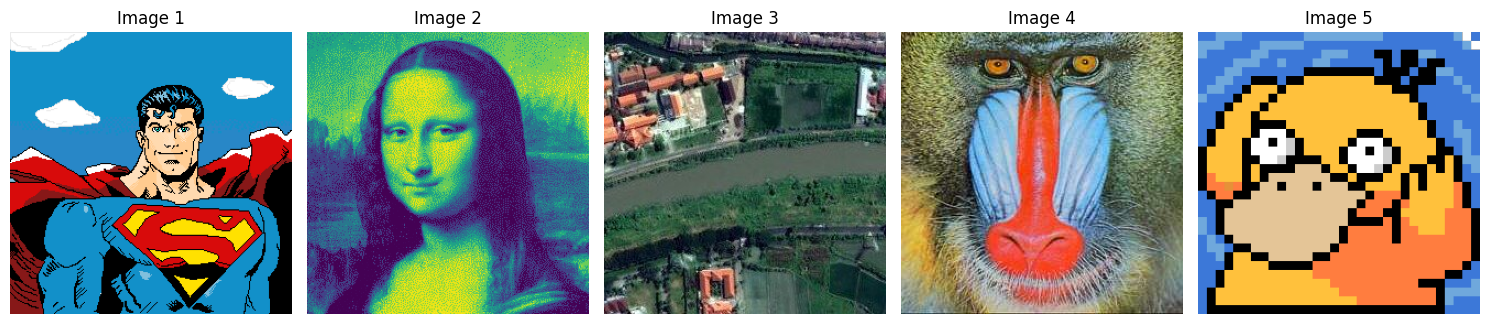

In [17]:
# Display the loaded images
plt.figure(figsize=(15, 5))  # Create a figure with a specific size
for i, img in enumerate(images):  # Loop through images with index
    plt.subplot(1, 5, i + 1)  # Create a subplot (1 row, 5 columns)
    plt.imshow(img)  # Show the image
    plt.axis('off')  # Remove axis lines and ticks
    plt.title(f'Image {i+1}')  # Add a title with the image number
plt.tight_layout()  # Adjust spacing to prevent overlap
plt.show()  # Display the figure

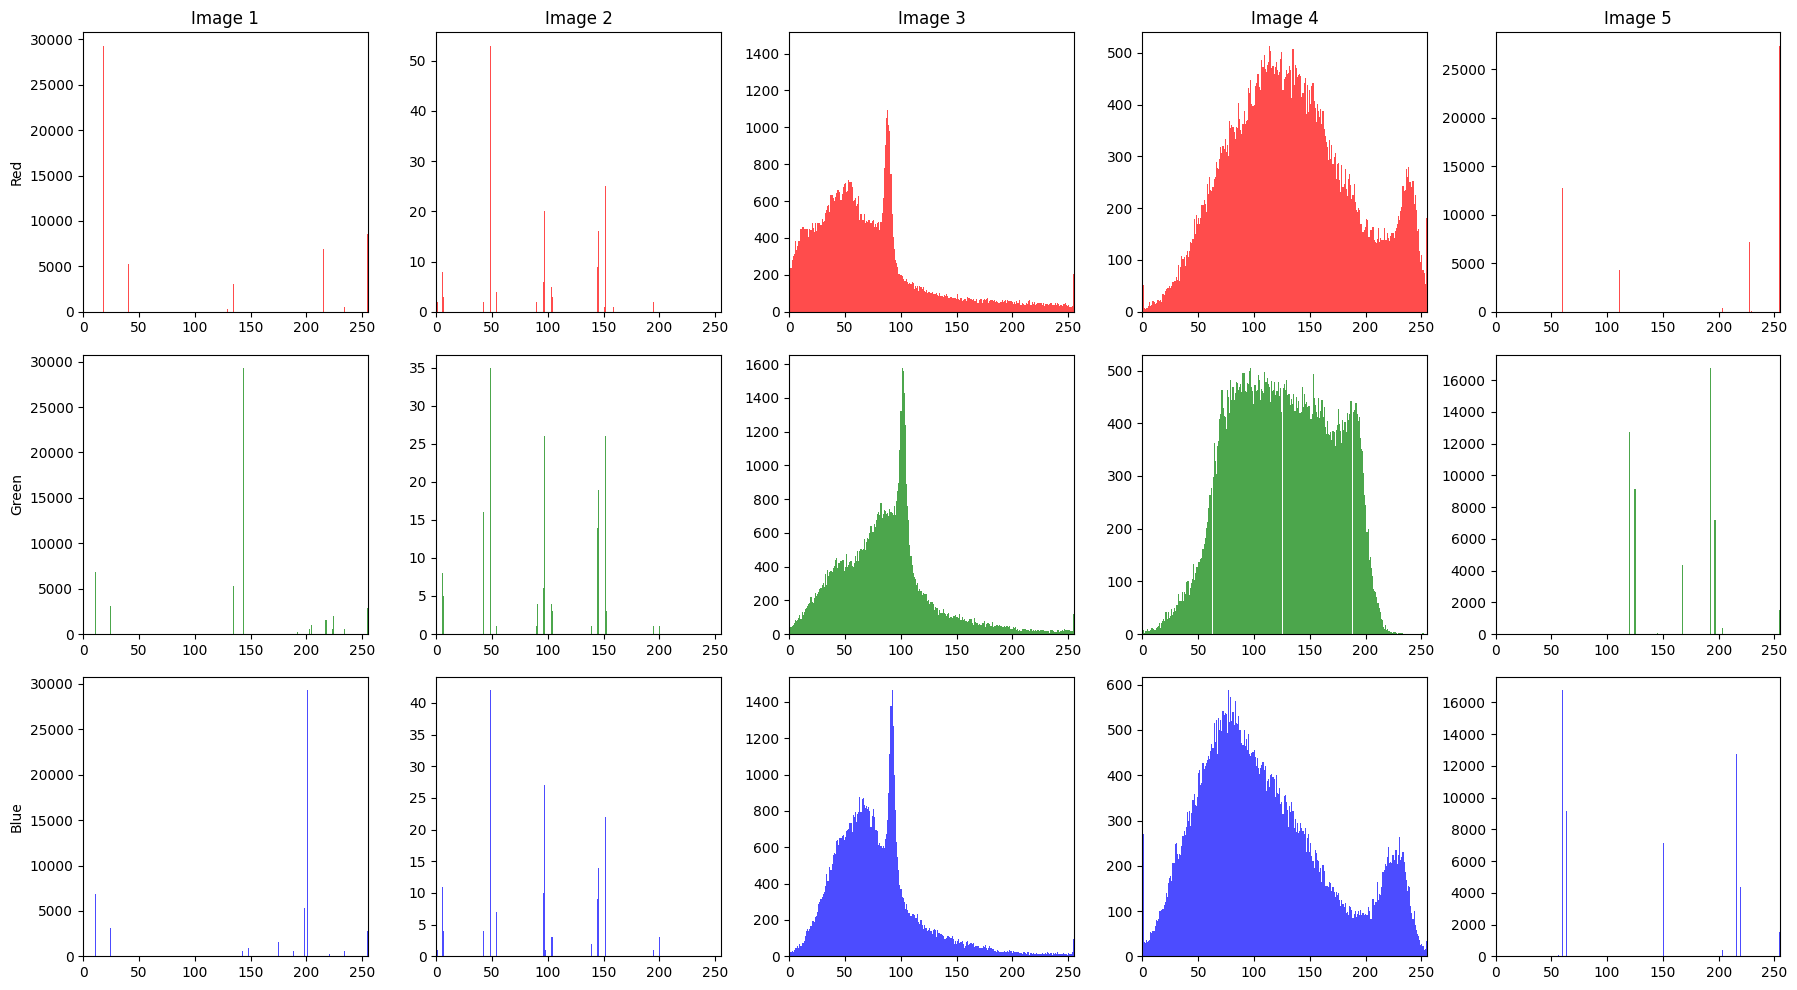

In [18]:
# Plot histograms for R, G, B channels of each image
plt.figure(figsize=(18, 10))  # Create a larger figure
channel_names = ['Red', 'Green', 'Blue']  # Define channel names
for col, img in enumerate(images):  # Loop through images (columns)
    for row, channel in enumerate(range(len(channel_names))):  # Loop through RGB channels (rows)
        plt.subplot(3, 5, row * 5 + col + 1)  # Arrange subplots in 3 rows, 5 columns
        plt.hist(
            img[..., channel].ravel(),  # Flatten the channel data
            bins=256,  # Use 256 bins (for 0–255 values)
            color=channel_names[row].lower(),  # Set histogram color to red/green/blue
            alpha=0.7  # Set transparency
        )
        if col == 0:  # For the first column, add channel labels
            plt.ylabel(channel_names[row])
        if row == 0:  # For the first row, add image titles
            plt.title(f'Image {col+1}')
        plt.xlim(0, 255)  # Limit x-axis to pixel intensity range
        plt.ylim(0, None)  # Auto-adjust y-axis
plt.tight_layout()  # Prevent subplot overlap
plt.show()  # Display histograms

In [19]:
# Calculate the mean and standard deviation of pixels for each image and channel
means = np.zeros((len(images), 3))  # Array for storing means (images × channels)
std = np.zeros((len(images), 3))   # Array for storing std (images × channels)
for i, img in enumerate(images):  # Loop through each image
    for channel in range(len(channel_names)):  # Loop through RGB channels
        means[i, channel] = img[..., channel].mean()  # Calculate mean of channel
        std[i, channel] = img[..., channel].std()  # Calculate standard deviation

In [20]:
# Standardize each image by its mean and std for each channel
standardized_images = []  # list to store standardized images

for i, img in enumerate(images):  # loop through each image
    standardized_img = np.zeros_like(img, dtype=np.float32)  # same shape as image, float
    for channel in range(3):  # loop through R, G, B channels
        standardized_img[..., channel] = (img[..., channel] - means[i, channel]) / std[i, channel]
    standardized_images.append(standardized_img)

In [21]:
import pandas as pd

# --- Original values (before standardization) ---
df_original = pd.DataFrame(
    np.hstack([means, std]),
    columns=['Red_mean', 'Green_mean', 'Blue_mean', 
             'Red_std', 'Green_std', 'Blue_std']
)
df_original.index = [f'Image {i+1}' for i in range(len(images))]
display(df_original)

# --- Standardized values (after standardization) ---
df_standardized = pd.DataFrame(
    np.hstack([np.zeros_like(means), np.ones_like(std)]),
    columns=['Red_mean', 'Green_mean', 'Blue_mean', 
             'Red_std', 'Green_std', 'Blue_std']
)
df_standardized.index = df_original.index
display(df_standardized)


,Red_mean,Green_mean,Blue_mean,Red_std,Green_std,Blue_std
Image 1,75.826553,110.166245,131.372772,96.116450,78.535959,95.162630
Image 2,85.929688,86.738281,91.820312,57.565477,54.143381,56.969349
Image 3,69.939087,86.402649,77.452911,51.555767,41.590068,38.494974
Image 4,134.253860,125.569565,109.965042,55.087127,44.551747,58.847204
Image 5,152.219727,130.173828,104.477539,107.564532,73.980460,84.294669


,Red_mean,Green_mean,Blue_mean,Red_std,Green_std,Blue_std
Image 1,0.0,0.0,0.0,1.0,1.0,1.0
Image 2,0.0,0.0,0.0,1.0,1.0,1.0
Image 3,0.0,0.0,0.0,1.0,1.0,1.0
Image 4,0.0,0.0,0.0,1.0,1.0,1.0
Image 5,0.0,0.0,0.0,1.0,1.0,1.0


## Audio manipulation


In this section, I used generative AI tools to generate a Python code, which reads the audio files because I haven't done something like this before. I also relied on them to generate inline comments for my code. The code itself was written independently, based on my prior knowledge.

**Prompt for Python code:**
```
Please create a Python code, which can read two audio files: audio1.mp3 and audio2.mp3. The spectogram of the audios should be plotted as well.
```

**Prompt for enchancing the text elements:**
```
Please rephrase the following texts in English, making them smoother and more natural.
```

**Prompt for the inline comments:**
```
Please explain the following code step by step in the form of inline comments. Do not make any changes to the code itself. 
```

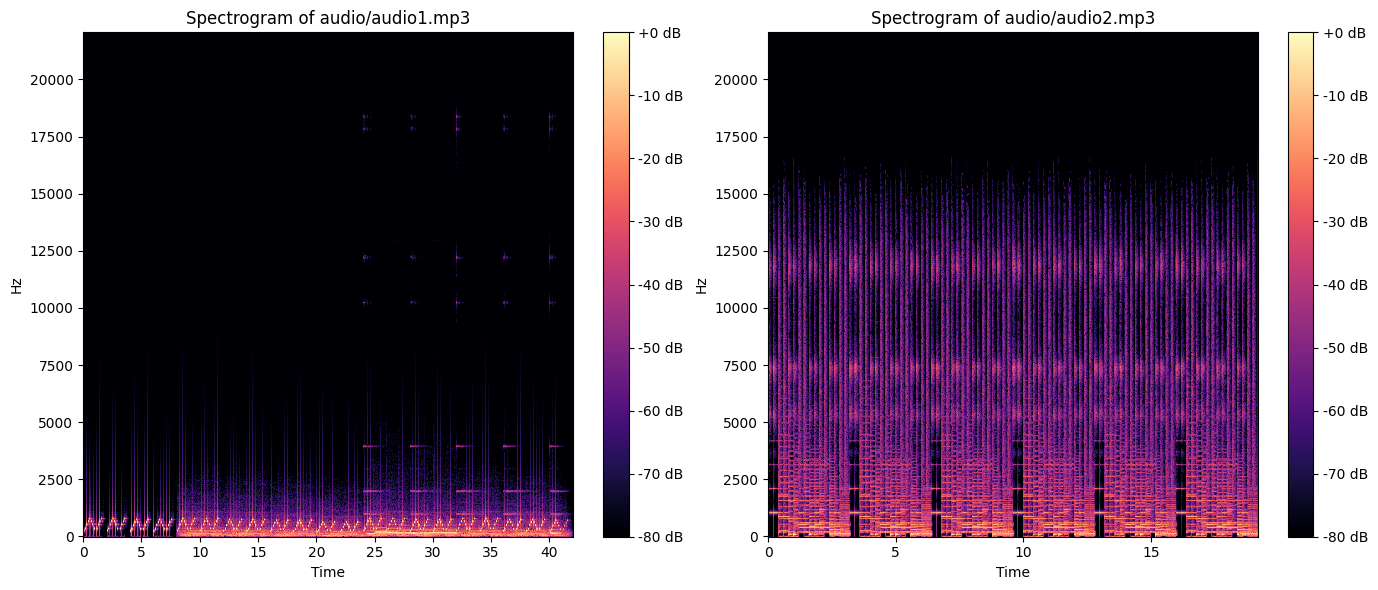

In [22]:
# Load and display the spectrograms of two audio files
import librosa
import librosa.display
import matplotlib.pyplot as plt

# List of audio file paths
audio_paths = ['audio/audio1.mp3', 'audio/audio2.mp3']

plt.figure(figsize=(14, 6))
for i, audio_path in enumerate(audio_paths):
    y, sr = librosa.load(audio_path, sr=None, mono=True)
    S = librosa.stft(y)
    S_db = librosa.amplitude_to_db(abs(S), ref=np.max)
    plt.subplot(1, 2, i + 1)
    librosa.display.specshow(S_db, sr=sr, x_axis='time', y_axis='hz', cmap='magma')
    plt.colorbar(format='%+2.0f dB')
    plt.title(f'Spectrogram of {audio_path}')
    plt.tight_layout()
plt.show()

In [23]:
# Standardize audio data to mean 0 and std 1 using librosa, show values in a table
import pandas as pd
import numpy as np
import librosa

audio_paths = ['audio/audio1.mp3', 'audio/audio2.mp3']
means = []
stdevs = []
standardized_audios = []

for audio_path in audio_paths:
    print(f'Processing {audio_path}...')
    y, sr = librosa.load(audio_path, sr=None, mono=True)
    mean = y.mean()
    std = y.std()
    means.append(mean)
    stdevs.append(std)
    standardized = (y - mean) / std
    standardized_audios.append(standardized)

# Check the mean and std of the standardized audios
standardized_means = [audio.mean() for audio in standardized_audios]
standardized_stds = [audio.std() for audio in standardized_audios]

# Display the results in a table
df_audio = pd.DataFrame({
    'Original Mean': means,
    'Original Std': stdevs,
    'Standardized Mean': standardized_means,
    'Standardized Std': standardized_stds
}, index=[f'Audio {i+1}' for i in range(len(audio_paths))])
display(df_audio)

Processing audio/audio1.mp3...
Processing audio/audio2.mp3...


,Original Mean,Original Std,Standardized Mean,Standardized Std
Audio 1,0.000014,0.090803,1.294684e-10,1.0
Audio 2,-0.004045,0.081513,-1.312818e-09,1.0


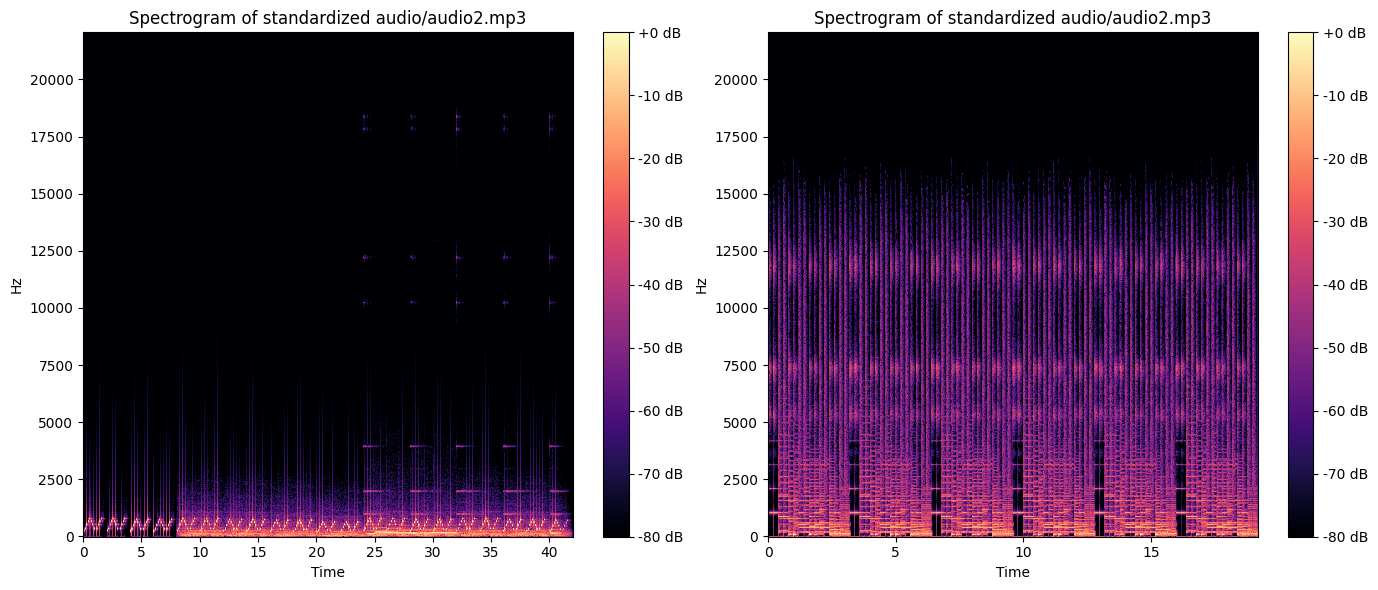

In [26]:
plt.figure(figsize=(14, 6))
for i, audio in enumerate(standardized_audios):
    S = librosa.stft(audio)
    S_db = librosa.amplitude_to_db(abs(S), ref=np.max)
    plt.subplot(1, 2, i + 1)
    librosa.display.specshow(S_db, sr=sr, x_axis='time', y_axis='hz', cmap='magma')
    plt.colorbar(format='%+2.0f dB')
    plt.title(f'Spectrogram of standardized {audio_path}')
    plt.tight_layout()
plt.show()

## Webscraping


In this section, I used generative AI tools to refine the grammar and improve the English of the text elements. I also relied on them to generate inline comments for my code. The code itself was written independently, based on my prior knowledge.

**Prompt for enchancing the text elements:**
```
Please rephrase the following texts in English, making them smoother and more natural.
```

**Prompt for the inline comments:**
```
Please explain the following code step by step in the form of inline comments. Do not make any changes to the code itself. 
```

 Deep Learning a gyakorlatban Python és LUA alapon - VITMAV45 | SmartLab, BME TMIT Languages Magyar English Menü be/kikapcsolás RÓLUNK Laborunkról Munkatársaink Média megjelenések MEGOLDÁSAINK Profivox magyar nyelvű felolvasó (korpuszos) Profivox magyar nyelvű felolvasó (DNN) Profivox magyar nyelvű felolvasó (HMM) Profivox magyar nyelvű felolvasó (diádos,triádos) StrokeAid Alkalmazások Jaws for Windows integráció Időjárás mindenkinek (magyar, Windows 8) AALFred (5 nyelven, Windows 8.1) Robobraille Beszélő ATM-ek Gyógyszervonal (OGYI) Árlista felolvasó (T-mobile) Keleti pályaudvar bemondórendszere Mindenség elmélete c. film gépi beszéd szinkron K+F Kutatási projektek (folyamatban) Kutatási projektek (befejezett) Publikációk (összes) Publikációk (kiemelt) Letölthető könyvek OKTATÁS KAPCSOLAT BLOG DEEP LEARNING A GYAKORLATBAN PYTHON ÉS LUA ALAPON Kezdőlap Oktatás Deep Learning Ha a tárgyról lecsúsztál, de szeretnél a deep learningbe belekezdeni, vagy már elvégezted a tárgyat és szeretnél


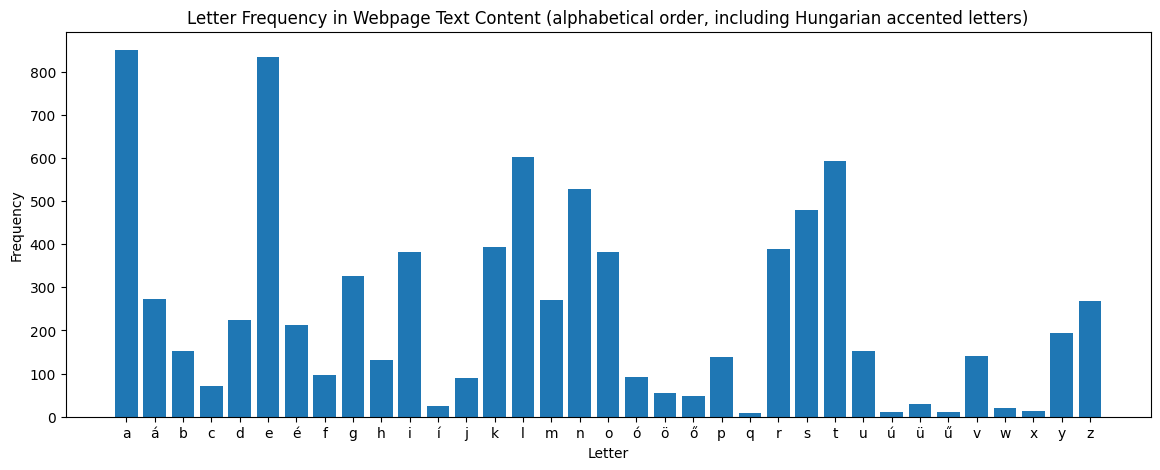

In [25]:
# Web scraping and letter frequency histogram (alphabetical order)
import requests
from collections import Counter
from bs4 import BeautifulSoup

# Download the web page content
url = 'https://smartlab.tmit.bme.hu/oktatas-deep-learning'
response = requests.get(url)
soup = BeautifulSoup(response.text, 'html.parser')

# Extract only visible text from the page
text = soup.get_text(separator=' ', strip=True)

# Define all letters to count (Latin + Hungarian accented)
hu_letters = list('aábcdeéfghiíjklmnoóöőpqrstuúüűvwxyz')

# Count letter occurrences (case-insensitive, including accents)
letters = [char.lower() for char in text if char.lower() in hu_letters]
letter_counts = Counter(letters)

# Sort the letters alphabetically for plotting
sorted_letters = sorted(letter_counts.keys(), key=lambda x: hu_letters.index(x))
sorted_counts = [letter_counts[letter] for letter in sorted_letters]

# Show the text content (first 1000 characters for preview)
print(text[:1000])

# Plot histogram
import matplotlib.pyplot as plt
plt.figure(figsize=(14, 5))
plt.bar(sorted_letters, sorted_counts)
plt.xlabel('Letter')
plt.ylabel('Frequency')
plt.title('Letter Frequency in Webpage Text Content (alphabetical order, including Hungarian accented letters)')
plt.show()